In [1]:
from keras.datasets.mnist import load_data
# ((x_train, y_train),(x_test, y_test))
(x_train, y_train),(x_test, y_test) = load_data()

Using TensorFlow backend.


In [2]:
# 查看資料
print(x_train.shape) 
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


答案是 9


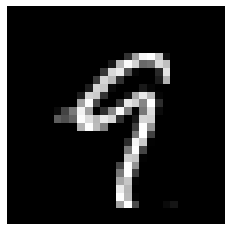

In [3]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
c = random.randint(0, x_train.shape[0]-1)
print("答案是",y_train[c]) #印出答案
plt.axis("off") #不要坐標軸
plt.imshow(x_train[c], cmap="gray")

In [4]:
#轉為df
import pandas as pd
pd.DataFrame(x_train[c])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,254,200,17,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,112,217,191,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,41,227,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,28,180,0,0,0,0,0,0,0


In [5]:
#建立模型
from keras.models import Sequential
from keras.layers import Dense
# https://keras.io/layers/core/
mlp = Sequential()
mlp.add(Dense(256, activation="relu", input_dim=784)) #第一層
mlp.add(Dense(10, activation="softmax"))              #第二層
mlp.summary()
#256*10=2560+10個及格分數 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [6]:
#處理圖片
x_train_shape = x_train.reshape(60000, 784) / 255
x_test_shape = x_test.reshape(10000, 784) / 255

In [7]:
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print("原本:", y_train[0])
print("後來:", y_train_cat[0])

原本: 5
後來: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
# 用adam優化就好了
mlp.compile(optimizer="adam",
            loss="categorical_crossentropy",
           metrics=["accuracy"])

In [9]:
mlp.fit(x_train_shape, y_train_cat,
        batch_size=200, epochs=15,
        verbose=2, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
 - 2s - loss: 0.3715 - acc: 0.8992 - val_loss: 0.1577 - val_acc: 0.9578
Epoch 2/15
 - 1s - loss: 0.1623 - acc: 0.9543 - val_loss: 0.1129 - val_acc: 0.9688
Epoch 3/15
 - 1s - loss: 0.1115 - acc: 0.9694 - val_loss: 0.1022 - val_acc: 0.9712
Epoch 4/15
 - 1s - loss: 0.0849 - acc: 0.9756 - val_loss: 0.0856 - val_acc: 0.9753
Epoch 5/15
 - 1s - loss: 0.0677 - acc: 0.9808 - val_loss: 0.0767 - val_acc: 0.9780
Epoch 6/15
 - 1s - loss: 0.0543 - acc: 0.9849 - val_loss: 0.0737 - val_acc: 0.9777
Epoch 7/15
 - 1s - loss: 0.0444 - acc: 0.9874 - val_loss: 0.0680 - val_acc: 0.9805
Epoch 8/15
 - 1s - loss: 0.0367 - acc: 0.9901 - val_loss: 0.0717 - val_acc: 0.9785
Epoch 9/15
 - 1s - loss: 0.0308 - acc: 0.9915 - val_loss: 0.0690 - val_acc: 0.9812
Epoch 10/15
 - 1s - loss: 0.0249 - acc: 0.9940 - val_loss: 0.0693 - val_acc: 0.9795
Epoch 11/15
 - 1s - loss: 0.0202 - acc: 0.9955 - val_loss: 0.0664 - val_acc: 0.9808
Epoch 12/15
 - 1s - loss: 0.0163 - a

In [10]:
mlp.evaluate(x_test_shape, y_test_cat)

10000/10000 [==============================] - 0s 15us/step


[0.06891290720383404, 0.9786]

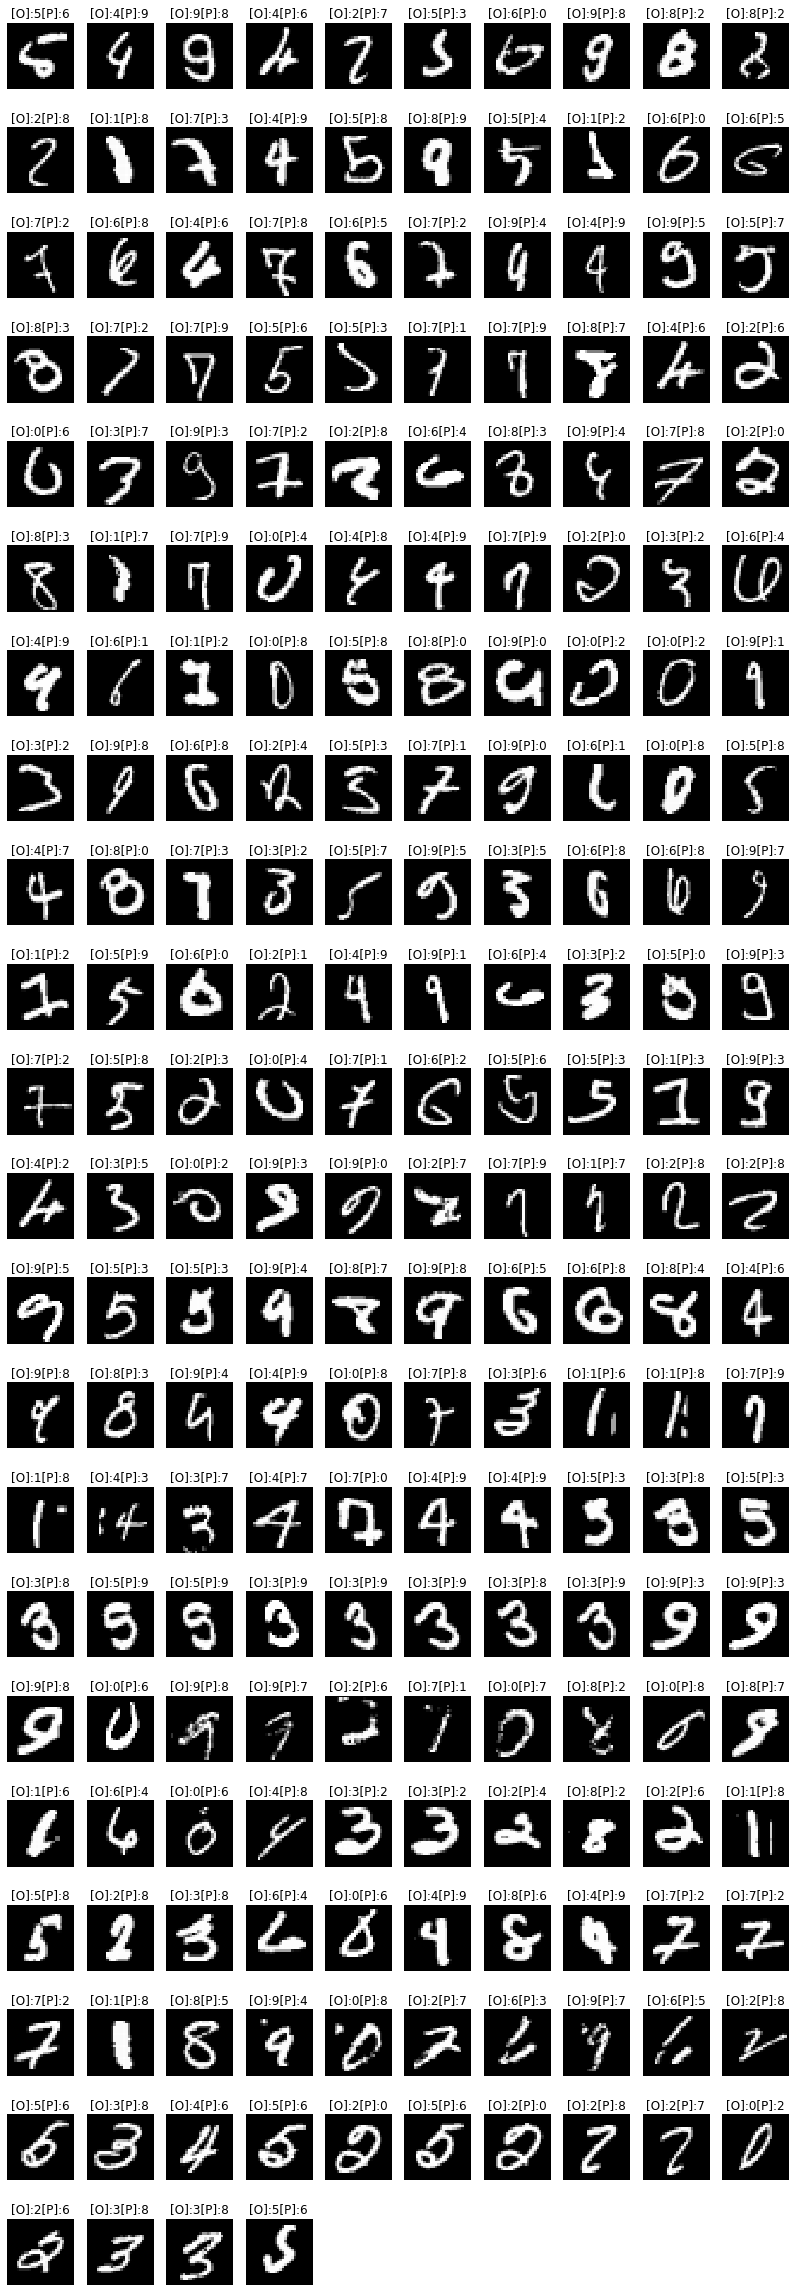

In [12]:
import numpy as np
pre = mlp.predict_classes(x_test_shape)
#找出不一樣預測的index
idx = np.nonzero(y_test != pre)[0] 
#把所有不一樣的圖片拿出來
false_img = x_test[idx]
false_ori_label = y_test[idx]
false_pre_label = pre[idx]
plt.figure(figsize=(14, 42))
width = 10
height = len(false_img) // width + 1
for i, img in enumerate(false_img):
    plt.subplot(height, width, i+1)
    msg = "[O]:" + str(false_ori_label[i]) + "[P]:" + str(false_pre_label[i])
    plt.title(msg)
    plt.axis("off")
    plt.imshow(img, cmap="gray")

In [13]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, pre))

,0,1,2,3,4,5,6,7,8,9
0,964,0,4,0,2,0,4,1,5,0
1,0,1122,3,1,0,0,2,2,5,0
2,4,1,1009,1,2,0,4,4,7,0
3,0,0,6,988,0,2,1,2,7,4
4,0,0,1,1,960,0,5,2,2,11
5,1,0,0,8,1,865,7,2,5,3
6,3,2,1,1,5,4,937,0,5,0
7,1,4,8,2,0,0,0,1004,3,6
8,2,0,4,4,1,1,1,3,957,1
9,3,2,0,6,5,3,0,3,7,980


你要判別哪一張:test.png
預測的答案: 6


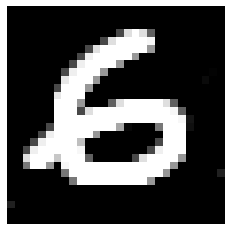

In [14]:
# Pillow(PIL)
from keras.preprocessing.image import load_img
fp = input("你要判別哪一張:")
img = np.array(load_img(fp, target_size=(28, 28)).convert("L"))
img_reshape = img.reshape(784) / 255
need_predict = np.array([img_reshape])
print("預測的答案:", mlp.predict_classes(need_predict)[0])
plt.axis("off")
plt.imshow(img, cmap="gray")

In [16]:
#儲存模型
mlp.save("mlp.h5")

In [17]:
#導入模型
# https://support.hdfgroup.org/products/java/release/download.html
from keras.models import load_model
loaded = load_model("mlp.h5")
loaded.evaluate(x_test_shape, y_test_cat)

10000/10000 [==============================] - 0s 20us/step


[0.06891290720383404, 0.9786]